# Tutorial 1. Introduction to TensorFlow

# Colab link

https://colab.research.google.com/drive/10i1tovcAXjIRoPI8IP5flrhoGuZLUSRe


This tutorial is aimed to make participants of Conversational Intelligence Summer School-2019 familiar with `TensorFlow` which is an open source software library for numerical computation using data flow graphs.

`TensorFlow` is being used in open source conversational intelligence library `DeepPavlov` as the main neural networks framework. The list of components using `TensorFlow` in `DeepPavlov` is the following:
* named entity tagger
* text classifier (`Keras` model with `TensorFlow` backend and BERT-based classifier on `TensorFlow`)
* goal-oriented bot
* ranker for non-factoid question answering (`Keras` model with `TensorFlow` backend)
* context-dependent question answering
* morpho-tagger (`Keras` model with `TensorFlow` backend)
* open-domain question answering

The tutorial is based on the [tutorial of CISS-2018](http://deephack.me/ciss#rec52232328).

## Plan

1. [Installation of `TensorFlow`](#Installation-of-TensorFlow)

2. [Graph](#Graph)

3. [Session](#Session)

4. [Variables](#Variables)

5. [Running a graph multiple times](#Running-a-graph-multiple-times)

6. [Loading external data](#Loading-external-data)

7. [Classification with coding task](#Classification)

## Installation of TensorFlow

In [1]:
!pip install tensorflow==1.10

     |████████████████████████████████| 58.4MB 1.4MB/s 
     |████████████████████████████████| 573kB 40.9MB/s 
     |████████████████████████████████| 3.3MB 39.3MB/s 
     |████████████████████████████████| 12.2MB 40.0MB/s 
ERROR: spacy 2.1.4 has requirement numpy>=1.15.0, but you'll have numpy 1.14.5 which is incompatible.
ERROR: magenta 0.3.19 has requirement tensorflow>=1.12.0, but you'll have tensorflow 1.10.0 which is incompatible.
ERROR: imgaug 0.2.9 has requirement numpy>=1.15.0, but you'll have numpy 1.14.5 which is incompatible.
ERROR: fastai 1.0.53.post2 has requirement numpy>=1.15, but you'll have numpy 1.14.5 which is incompatible.
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
ERROR: blis 0.2.4 has requirement numpy>=1.15.0, but you'll have numpy 1.14.5 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing i

In [0]:
import numpy as np
import tensorflow as tf

`TensorFlow` assumes two computational phases:

* Graph - defining a computation,
* Session - executing it.

A computational graph is a network of nodes, with each node representing an arithmetic operation. 

Note that all constants and variables that you define are added to graph, even if you don't define the graph object explicitly. In this case they are saved in ``default graph``. You can get the access to your graph with procedure ``tf.get_default_graph()``.

In [3]:
# we will discuss sessions later
tf.InteractiveSession()

In [4]:
a = tf.zeros((2, 2))
b = tf.ones((2, 2))
c = tf.constant([1, 2], dtype=tf.float32)
print(a, b, c)

Tensor("zeros:0", shape=(2, 2), dtype=float32) Tensor("ones:0", shape=(2, 2), dtype=float32) Tensor("Const:0", shape=(2,), dtype=float32)


In [5]:
print(a.eval(), b.eval(), c.eval())

[[0. 0.]
 [0. 0.]] [[1. 1.]
 [1. 1.]] [1. 2.]


In [6]:
print(tf.reduce_sum(b, axis=1).eval())  # don't forget about eval()
print(tf.add(b, c).eval())

[2. 2.]
[[2. 3.]
 [2. 3.]]


In [7]:
# This is not an operation on graph - it just gets the information about the node,
# so we don't need eval()
print(a.get_shape())

# These operations change the node, though
print(tf.reshape(a, (1, 4)).eval())
print(tf.reshape(a, (-1, 4)).eval())

(2, 2)
[[0. 0. 0. 0.]]
[[0. 0. 0. 0.]]


# Graph

A computational graph is a network of nodes, with each node representing an arithmetic operation.

Note that all constants and variables that you define are added to graph, even if you don't define the graph object explicitly. In this case they are saved in `default graph`. You can get the access to your graph with procedure `tf.get_default_graph()`.

In [0]:
# We can save the graph with the following line of code
file_writer = tf.summary.FileWriter('./just-initial', tf.get_default_graph())

FileWriter object writes all information about your TF graph (graph itself, values of variables, etc.) in a file. You should provide a directory to save the information, and the graph to save.

After running the above cell you'll be able to see the graph using `tensorboard` tool you should go to the directory of this notebook and run the following command in shell:
```
tensorboard --logdir=./
```
and then open the page http://localhost:6006 in your browser.

# Session


Building of a graph does not automatically execute it. In order to get the values of nodes you should compute your graph in a `Session`. `Session` creates an environment to execute a graph, you can't do it outside a session.

The method `run()` of a session performs computations. It has one required element -- a node to compute.

In [9]:
a = tf.ones(5)

with tf.Session() as session:
    print(session.run(a))

[1. 1. 1. 1. 1.]


Unlike `Graph`, `Session` is not defined implicitly. There is a function `tf.get_default_session()`, but you need to specify which `Session` you will use as default.
In iPython it is convenient to use `InteractiveSession` object (as we did above). If an instance of the `InteractiveSession` class has been created, it is treated as a default session. If you have an `InteractiveSession`, you can use `eval()` procedure in your code which is in fact equivalent to 

```tf.get_default_session().run()```

**NB**: In notebooks it is easier to use `InteractiveSession`, but it is not recommended in scripts. There, you  should separate building of the graph from computations.

In [10]:
# let's recap different ways of evaluating nodes of a graph
a = tf.constant(-2.0)
b = tf.constant(3.0)
c = a * b

# let's create a session explicitly
with tf.Session() as sess:
    print(c)              # print the name of a node in the graph
    print(sess.run(c))    # compute the node and print the result
    print(c.eval())       # another way of computing the node

# the graph is saved, you can look at it using `tensorboard`
file_writer = tf.summary.FileWriter('./second-try', tf.get_default_graph())

Tensor("mul:0", shape=(), dtype=float32)
-6.0
-6.0


# Variables

So far we experimented only with constant tensors - they can be created using functions `tf.Tensor()`, `tf.constant()`, `tf.zeros()`, etc. 

For model weights storage we will use `Variable` objects.

`Variable` constructor accepts constant of any type. An important difference between `Variable` and `constant` is that variable requires initialisation.

In [11]:
tf.reset_default_graph() # reset the graph

W1 = tf.ones((2, 2))  # a 2x2 tensor of ones
W2 = tf.Variable(tf.zeros((2, 2)), name='weights')

with tf.Session() as sess:
    print(sess.run(W1))
    
    sess.run(tf.global_variables_initializer())  # initialises all Variables, try running the code without it
    print(sess.run(W2))
    
# check the graph for variables
file_writer = tf.summary.FileWriter('./vars', tf.get_default_graph())

[[1. 1.]
 [1. 1.]]
[[0. 0.]
 [0. 0.]]


Another way of creating a `Variable` is to call `tf.get_variable()`. It is called as follows:
```
var = tf.get_variable('my_var', shape=(3,4), initializer=tf.random_normal_initializer())
```
The first argument is variable name. 

The difference between `tf.get_variable` and `Variable` constructor is that you need to pass the initial value of a variable to the constructor, whereas when using `tf.get_variable` you need to define variable shape and the way of initializing it (e.g. from the normal distribution).

## Running a graph multiple times

Once we have `Variables` which save values between the runs, we can try computing a graph multiple times.

All the computations in a graph should be organised differently from how you would do it in regular Python code.

This is an example of making a counter in a graph to count the number of training epochs

In [12]:
tf.reset_default_graph() # try commenting out and running the cell multiple times
                         # what happens with the computational graph?

state = tf.Variable(0, name="counter")
new_value = tf.add(state, tf.constant(1))

update_op = tf.assign(state, new_value)   # state <- new_value

file_writer = tf.summary.FileWriter('./counter', tf.get_default_graph())

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    print(state.eval())
    
    for i in range(10):
        sess.run(update_op)
        print(state.eval())
        
file_writer = tf.summary.FileWriter('./counter', tf.get_default_graph())

0
1
2
3
4
5
6
7
8
9
10


## Loading external data

`Variables` serve for changeable objects (e.g. model weights). We don't need them to store the input data, because it doesn't change.

However, the graph is built before actual computations or loading the data. It means that we cannot use `constant` tensors for inputs. Instead of that we will use `placehoders`. They are tensors that can be placed in a graph without initialisation.

When a graph has already been created, you can insert your data into a `placehoder` using `feed_dict`.

`feed_dict` is a dictionary where keys are **placeholders** which you need to compute the node, and values are **data objects** you need to use instead of these placeholders.

When defining a `placeholder` you need to define its type and shape. However, if you don't know some of the dimensions (e.g. size of your dataset), you can replace them with `None`:
```
my_input = tf.placeholder(tf.float32, (None, 5))
```
`my_input` is a matrix with 5 columns and unknown number of rows.

In [13]:
# placeholders for vectors of unknown size
inp1 = tf.placeholder(tf.float32, (None))
inp2 = tf.placeholder(tf.float32, (None))

out = inp1 * inp2

# we first feed in single numbers
with tf.Session() as sess:
    feed_dict = {inp1: 10, inp2: -4}
    print(sess.run(out, feed_dict=feed_dict))

-40.0


In [14]:
# And now try arrays
with tf.Session() as sess:
    # make sure that the operation can be done on objects of given sizes
    feed_dict = {inp1: np.array([10]), inp2: np.array([-4, 10, 100])}
    print(sess.run(out, feed_dict=feed_dict))
file_writer = tf.summary.FileWriter('./placeholders', tf.get_default_graph())

[ -40.  100. 1000.]


# Classification

Let's solve classification task for Iris dataset from sklearn.

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

# the data is already stored in sklearn library
# we'll take it from there
from sklearn.datasets import load_iris

iris_data = load_iris()

In [16]:
iris_data.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [17]:
X = iris_data.data
X[:3]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2]])

In [18]:
iris_data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [19]:
y = iris_data.target
print(y[:100])
# let's convert data to one-hot representation
eye = np.eye(len(iris_data.target_names))
y = eye[y]

y[:3]

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]])

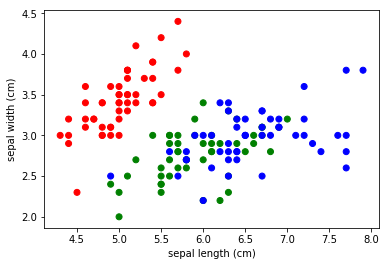

In [20]:
colors = np.array(["r", "g", "b"])
p = plt.scatter(X[:, 0], X[:, 1], c=colors[iris_data.target])

l = plt.xlabel(iris_data.feature_names[0])
l = plt.ylabel(iris_data.feature_names[1])

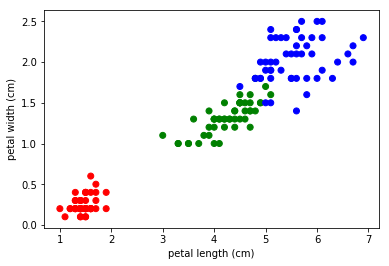

In [21]:
colors = np.array(["r", "g", "b"])
p = plt.scatter(X[:, 2], X[:, 3], c=colors[iris_data.target])

l = plt.xlabel(iris_data.feature_names[2])
l = plt.ylabel(iris_data.feature_names[3])

In [22]:
# normalise feature values to make training more stable
X = X / X.std()

# training parameters
batch_size = 32
n_samples = X.shape[0]
n_features = X.shape[1]
n_classes = y.shape[1]

print(X.shape, y.shape)

(150, 4) (150, 3)


Let's now build the graph.

You should first define the parameters of the model - weight matrix `W` and bias vector `b`.

The shape of `W` is n_features $\times$ n_classes (4 $\times$ 3 in our case).
The length of `b` is n_classes (3 in our case).

You should initialise both variables with values from normal distribution (you can use `tf.random_normal_initializer()`).

Then you should define the value of prediction: $\hat{y} = X \times W + b$.

Finally, define the loss: 

$$L = \frac{1}{N} \sum_{i=0}^{N} (y_i-\hat{y_i})^{2}$$

where *N* is the number of samples

**NB**: you can multiply matrices with `tf.matmul` and sum vectors with `tf.reduce_sum`. As well as you can use `tf.layers.dense` and `tf.losses.mean_squared_error`.

In [0]:
tf.reset_default_graph()

# create placeholders
# these should be tensors of type tf.float32
# X should be a matrix of size batch_size * n_features
# y should be a matrix of size batch_size * 1

# here is your code
X_ph = tf.placeholder(tf.float32, (batch_size, n_features))
y_ph = tf.placeholder(tf.float32, (batch_size, n_classes))

with tf.variable_scope("iris"):
    # here you can either 
    # create randomly initialized weights of the model by hands
    # and define model prediction through matrix operations,
    # or use just tf.layers.dense on the defined number of classes
    # define loss using mean_squared_error
    
    # here is your code
    
    loss = tf.losses.mean_squared_error(y_ph, y_pred)

Our task is to minimise `loss`. In order to do that we should define an optimiser and define an operation for it (minimisation). We recommend using Adam optimiser:

In [0]:
opt = tf.train.AdamOptimizer()
train_op = opt.minimize(loss)

In [0]:
# write graph to a file
file_writer = tf.summary.FileWriter('./iris', tf.get_default_graph())

# we'll put values of loss here
train_history = []

with tf.Session() as sess:
    # don't forget to initialise variables
    sess.run(tf.initialize_all_variables())
    
    # train a model
    for _ in range(3000):
        idx = np.random.choice(n_samples, batch_size)
        X_batch, y_batch = X[idx, :], y[idx, :]
        # run the session given loss and train operation as inputs
        # and feeding dict with batch of X and y
        # note that session.run returns loss_value
        # and additional information (you don't need it)
        
        # here is your code
        
        train_history.append(loss_value)

In [0]:
plt.plot(train_history)
plt.show()